# Targeted Social Media Campaign Segmentation 

<>:35: SyntaxWarning: invalid escape sequence '\$'
<>:35: SyntaxWarning: invalid escape sequence '\$'
C:\Users\milto\AppData\Local\Temp\ipykernel_2892\2790160318.py:35: SyntaxWarning: invalid escape sequence '\$'
  df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)



--- Initial Exploration of the Dataset ---

First 5 rows of the dataset:
   Campaign_ID Target_Audience     Campaign_Goal Duration Channel_Used  \
0       529013       Men 35-44    Product Launch  15 Days    Instagram   
1       275352     Women 45-60  Market Expansion  15 Days     Facebook   
2       692322       Men 45-60    Product Launch  15 Days    Instagram   
3       675757       Men 25-34    Increase Sales  15 Days    Pinterest   
4       535900       Men 45-60  Market Expansion  15 Days    Pinterest   

   Conversion_Rate Acquisition_Cost       ROI     Location Language  Clicks  \
0             0.15          $500.00  5.790000    Las Vegas  Spanish     500   
1             0.01          $500.00  7.210000  Los Angeles   French     500   
2             0.08          $500.00  0.430000       Austin  Spanish     500   
3             0.03          $500.00  0.909824        Miami  Spanish     293   
4             0.13          $500.00  1.422828       Austin   French     293   

   Imp

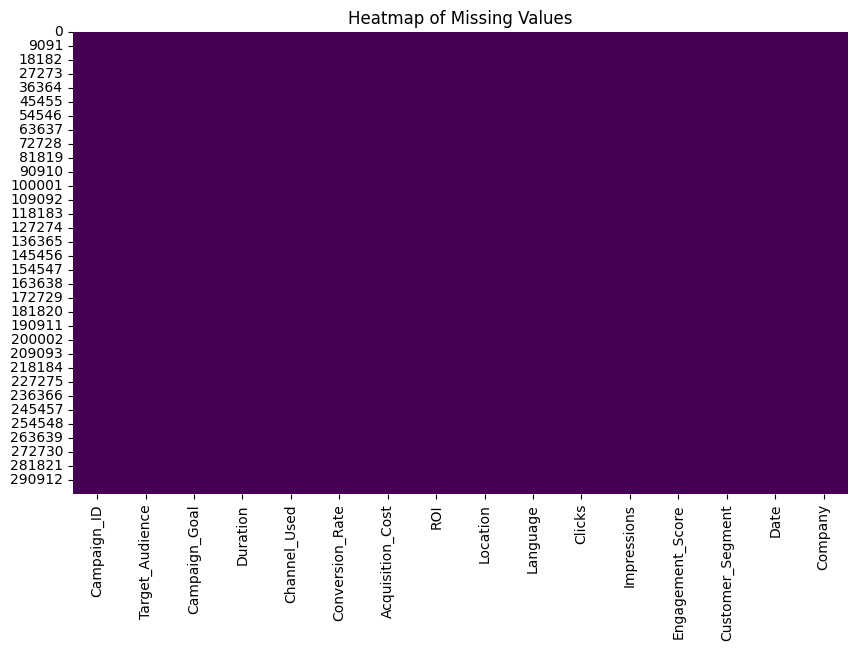


--- Data Type and Consistency Check ---

Updated Data Types:
Campaign_ID            int64
Target_Audience     category
Campaign_Goal       category
Duration            category
Channel_Used        category
Conversion_Rate      float64
Acquisition_Cost     float64
ROI                  float64
Location            category
Language            category
Clicks                 int64
Impressions            int64
Engagement_Score       int64
Customer_Segment    category
Date                  object
Company               object
dtype: object

--- Duplicate Data Check ---
Number of duplicate rows found: 0

--- Outlier Detection ---
Number of potential outliers in 'Campaign_ID': 0
Number of potential outliers in 'Conversion_Rate': 0
Number of potential outliers in 'Acquisition_Cost': 0
Number of potential outliers in 'ROI': 0
Number of potential outliers in 'Clicks': 0
Number of potential outliers in 'Impressions': 0
Number of potential outliers in 'Engagement_Score': 0

--- Correlation Analysis

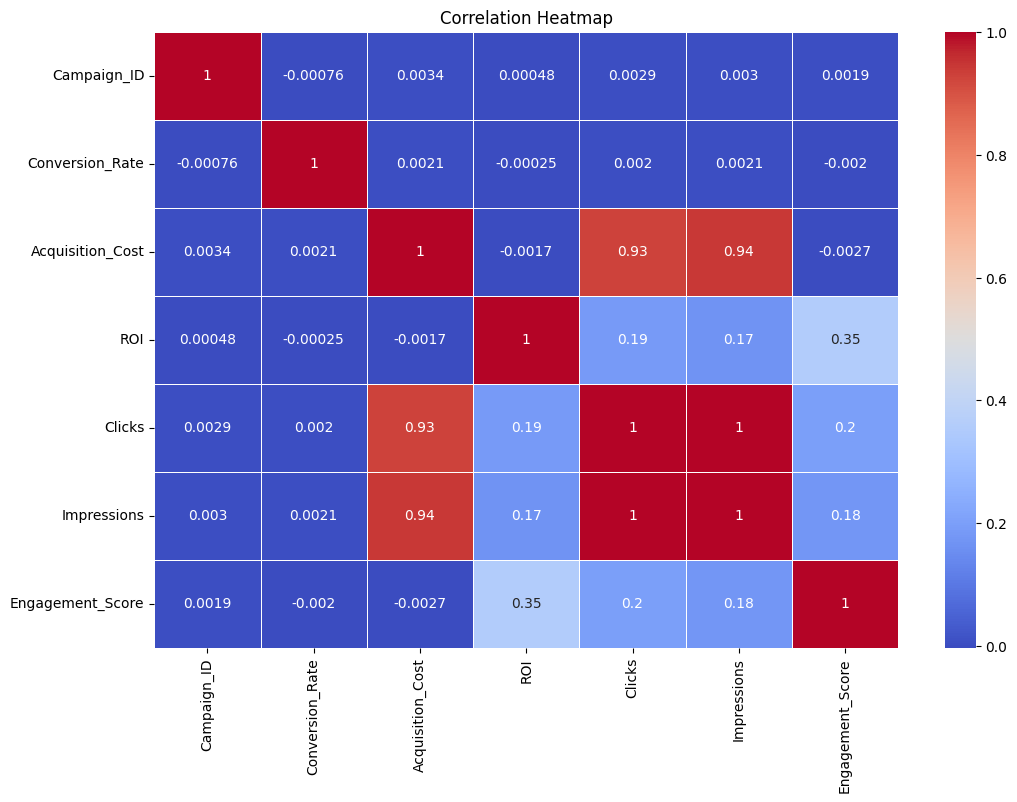


--- Summary of Findings ---
Highly Correlated Features:
                  Campaign_ID  Conversion_Rate  Acquisition_Cost  ROI  \
Campaign_ID               1.0              NaN               NaN  NaN   
Conversion_Rate           NaN              1.0               NaN  NaN   
Acquisition_Cost          NaN              NaN          1.000000  NaN   
ROI                       NaN              NaN               NaN  1.0   
Clicks                    NaN              NaN          0.925816  NaN   
Impressions               NaN              NaN          0.943342  NaN   
Engagement_Score          NaN              NaN               NaN  NaN   

                    Clicks  Impressions  Engagement_Score  
Campaign_ID            NaN          NaN               NaN  
Conversion_Rate        NaN          NaN               NaN  
Acquisition_Cost  0.925816     0.943342               NaN  
ROI                    NaN          NaN               NaN  
Clicks            1.000000     0.998769               NaN 

In [2]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the zip file path
zip_file_path = 'Social Media Advertising.zip'

# Step 1: Extract the dataset from zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()
    extracted_files = zip_ref.namelist()

csv_file_name = extracted_files[0]

# Load the CSV data into a pandas DataFrame
df = pd.read_csv(csv_file_name)

# Step 1: Initial Exploration of the Dataset
print("\n--- Initial Exploration of the Dataset ---")
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics for Numerical Features:")
print(df.describe())
print("\nSummary for Categorical Features:")
print(df.describe(include='object'))

# Step 2: Clean Currency Columns
print("\n--- Cleaning Currency Columns ---")
# Convert "Acquisition_Cost" from a string with "$" to a float
if 'Acquisition_Cost' in df.columns:
    df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

print("\nUpdated Acquisition_Cost column:")
print(df['Acquisition_Cost'].head())

# Step 2: Identify Missing Values
print("\n--- Missing Values Analysis ---")
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("\nColumns with Missing Values:")
print(missing_columns)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Step 3: Data Type and Consistency Check
print("\n--- Data Type and Consistency Check ---")
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    unique_values = df[col].nunique()
    if unique_values < 50:
        df[col] = df[col].astype('category')

print("\nUpdated Data Types:")
print(df.dtypes)

# Fill missing values
for col in missing_columns.index:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\n--- Duplicate Data Check ---")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"{duplicates} duplicates have been removed.")

# Step 6: Outlier Detection
print("\n--- Outlier Detection ---")
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    num_outliers = len(outliers)
    print(f"Number of potential outliers in '{col}': {num_outliers}")

# Step 8: Correlation Analysis
print("\n--- Correlation Analysis ---")
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Step 9: Summary of Findings
print("\n--- Summary of Findings ---")
high_corr_features = corr_matrix[corr_matrix.abs() > 0.7]
print("Highly Correlated Features:")
print(high_corr_features)


In [3]:
# Data Preparation

In [4]:
print("\n--- Post-Merge Missing Values Analysis ---")
post_merge_missing_values = df.isnull().sum()
post_merge_missing_columns = post_merge_missing_values[post_merge_missing_values > 0]
if post_merge_missing_columns.empty:
    print("No missing values found in the dataset after merging.")
else:
    print("Columns with Missing Values After Merging:")
    print(post_merge_missing_columns)


--- Post-Merge Missing Values Analysis ---
No missing values found in the dataset after merging.


In [5]:
print("\n--- Dataset Overview After Merge ---")
print(df.info())
print(df.head())


--- Dataset Overview After Merge ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Campaign_ID       300000 non-null  int64   
 1   Target_Audience   300000 non-null  category
 2   Campaign_Goal     300000 non-null  category
 3   Duration          300000 non-null  category
 4   Channel_Used      300000 non-null  category
 5   Conversion_Rate   300000 non-null  float64 
 6   Acquisition_Cost  300000 non-null  float64 
 7   ROI               300000 non-null  float64 
 8   Location          300000 non-null  category
 9   Language          300000 non-null  category
 10  Clicks            300000 non-null  int64   
 11  Impressions       300000 non-null  int64   
 12  Engagement_Score  300000 non-null  int64   
 13  Customer_Segment  300000 non-null  category
 14  Date              300000 non-null  object  
 15  Company      

In [6]:
if not post_merge_missing_columns.empty:
    print("\n--- Handling Remaining Missing Values ---")
    for col in post_merge_missing_columns.index:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
    print("Remaining missing values have been handled.")

In [7]:
print("\n--- Post-Merge Duplicate Data Check ---")
duplicates_after_merge = df.duplicated().sum()
print(f"Number of duplicate rows found after merging: {duplicates_after_merge}")
if duplicates_after_merge > 0:
    df.drop_duplicates(inplace=True)
    print(f"{duplicates_after_merge} duplicates have been removed.")


--- Post-Merge Duplicate Data Check ---
Number of duplicate rows found after merging: 0


In [8]:
print("\n--- Final Data Verification Before Feature Engineering ---")

# Verify data types
print("\nData Types:")
print(df.dtypes)

# Verify missing values
print("\nMissing Values Summary:")
missing_values_final = df.isnull().sum()
print(missing_values_final[missing_values_final > 0])

# Verify basic statistics
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

# Final dataset shape
print("\nFinal Dataset Shape:", df.shape)


--- Final Data Verification Before Feature Engineering ---

Data Types:
Campaign_ID            int64
Target_Audience     category
Campaign_Goal       category
Duration            category
Channel_Used        category
Conversion_Rate      float64
Acquisition_Cost     float64
ROI                  float64
Location            category
Language            category
Clicks                 int64
Impressions            int64
Engagement_Score       int64
Customer_Segment    category
Date                  object
Company               object
dtype: object

Missing Values Summary:
Series([], dtype: int64)

Summary Statistics for Numerical Columns:
         Campaign_ID  Conversion_Rate  Acquisition_Cost            ROI  \
count  300000.000000    300000.000000     300000.000000  300000.000000   
mean   550444.804487         0.080009       7753.750796       3.177691   
std    260252.586037         0.040563       4301.035148       2.461200   
min    100001.000000         0.010000        500.000000     

In [9]:
# Feature Engineering

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 1: Feature Engineering - Derived Features
# ----------------------------------------------

# Calculate Cost per Acquisition (CPA)
# Acquisition_Cost is already converted to numeric in earlier steps
df['CPA'] = df['Acquisition_Cost'] / (df['Conversion_Rate'] * df['Clicks'])
df['CPA'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Handle division by zero
df['CPA'].fillna(0, inplace=True)  # Replace NaNs with zero

# Calculate Total Spend
# Assuming 'Acquisition_Cost' represents the spending for each campaign
df['Total_Spend'] = df['Acquisition_Cost']

# Calculate Return on Advertising Spend (ROAS)
# ROAS = (Revenue generated from campaign) / (Total campaign spend)
# Assuming `Revenue` is indirectly available as `Clicks * Conversion_Rate * CPA`
df['ROAS'] = (df['Clicks'] * df['Conversion_Rate'] * df['CPA']) / df['Total_Spend']
df['ROAS'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['ROAS'].fillna(0, inplace=True)

# Calculate Click-Through Rate (CTR)
df['CTR'] = df['Clicks'] / df['Impressions']
df['CTR'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['CTR'].fillna(0, inplace=True)

# Engagement Rate
df['Engagement_Rate'] = df['Engagement_Score'] / df['Impressions']
df['Engagement_Rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Engagement_Rate'].fillna(0, inplace=True)

# Seasonality Features
# Extracting Date Features for seasonality analysis
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter
df['Is_Weekend'] = df['Date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

# Step 2: Customer Lifetime Value (CLTV) - Placeholder Calculation
# Note: You may need customer purchase history to accurately compute CLTV. Here is a simple proxy:
df['CLTV'] = df['Conversion_Rate'] * df['Total_Spend'] * df['Engagement_Rate']

print("\n--- Derived Features - First 5 Rows ---")
print(df.head())

# Step 3: Aggregating Data for Channel-wise Insights Over a Period
# ---------------------------------------------------------------

# Calculate weekly spend, impressions, clicks, and conversion rate per channel
weekly_channel_summary = df.groupby(['Year', 'Week', 'Channel_Used']).agg({
    'Total_Spend': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Conversion_Rate': 'mean'
}).reset_index()

# Calculate CPA and ROI over time for each channel
weekly_channel_summary['CPA'] = weekly_channel_summary['Total_Spend'] / weekly_channel_summary['Clicks']
weekly_channel_summary['CPA'].replace([np.inf, -np.inf], np.nan, inplace=True)
weekly_channel_summary['CPA'].fillna(0, inplace=True)

weekly_channel_summary['ROI'] = (weekly_channel_summary['Clicks'] * weekly_channel_summary['Conversion_Rate'] * weekly_channel_summary['CPA']) / weekly_channel_summary['Total_Spend']
weekly_channel_summary['ROI'].replace([np.inf, -np.inf], np.nan, inplace=True)
weekly_channel_summary['ROI'].fillna(0, inplace=True)

print("\n--- Weekly Channel Summary - First 5 Rows ---")
print(weekly_channel_summary.head())

# Step 4: Normalization and Encoding
# ----------------------------------

# Select numerical columns for normalization
numerical_features = ['Acquisition_Cost', 'CPA', 'Total_Spend', 'CTR', 'Engagement_Rate', 'ROAS', 'CLTV']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("\n--- Scaled Numerical Features - First 5 Rows ---")
print(df.head())

# One-Hot Encoding of Categorical Features
categorical_columns = ['Target_Audience', 'Campaign_Goal', 'Channel_Used', 'Location', 'Language', 'Customer_Segment', 'Company']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("\n--- Encoded Dataset - Dataset Information ---")
print(df_encoded.info())

# Step 5: Final Check Before Modeling
# -----------------------------------

# Verify data types and missing values after feature engineering
print("\n--- Final Data Check Before Modeling ---")
print("Data Types:\n", df_encoded.dtypes)
print("\nMissing Values Summary:\n", df_encoded.isnull().sum())

# Display a sample of the processed data
print("\n--- Final Processed Dataset (First 5 Rows) ---")
print(df_encoded.head())

# At this point, the dataset is ready for modeling and analysis.


--- Derived Features - First 5 Rows ---
   Campaign_ID Target_Audience     Campaign_Goal Duration Channel_Used  \
0       529013       Men 35-44    Product Launch  15 Days    Instagram   
1       275352     Women 45-60  Market Expansion  15 Days     Facebook   
2       692322       Men 45-60    Product Launch  15 Days    Instagram   
3       675757       Men 25-34    Increase Sales  15 Days    Pinterest   
4       535900       Men 45-60  Market Expansion  15 Days    Pinterest   

   Conversion_Rate  Acquisition_Cost       ROI     Location Language  ...  \
0             0.15             500.0  5.790000    Las Vegas  Spanish  ...   
1             0.01             500.0  7.210000  Los Angeles   French  ...   
2             0.08             500.0  0.430000       Austin  Spanish  ...   
3             0.03             500.0  0.909824        Miami  Spanish  ...   
4             0.13             500.0  1.422828       Austin   French  ...   

   Total_Spend  ROAS       CTR Engagement_Rate Week

C:\Users\milto\AppData\Local\Temp\ipykernel_2892\1134410163.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_channel_summary = df.groupby(['Year', 'Week', 'Channel_Used']).agg({



--- Encoded Dataset - Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 93 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Campaign_ID                     300000 non-null  int64         
 1   Duration                        300000 non-null  category      
 2   Conversion_Rate                 300000 non-null  float64       
 3   Acquisition_Cost                300000 non-null  float64       
 4   ROI                             300000 non-null  float64       
 5   Clicks                          300000 non-null  int64         
 6   Impressions                     300000 non-null  int64         
 7   Engagement_Score                300000 non-null  int64         
 8   Date                            300000 non-null  datetime64[ns]
 9   CPA                             300000 non-null  float64       
 10  Total_Spe

In [11]:
# Modeling

In [12]:
# Step 1: Feature Selection for Clustering

features_for_clustering = ['CTR', 'Engagement_Rate', 'ROAS', 'CLTV', 'Total_Spend']
X_clustering = df_encoded[features_for_clustering]

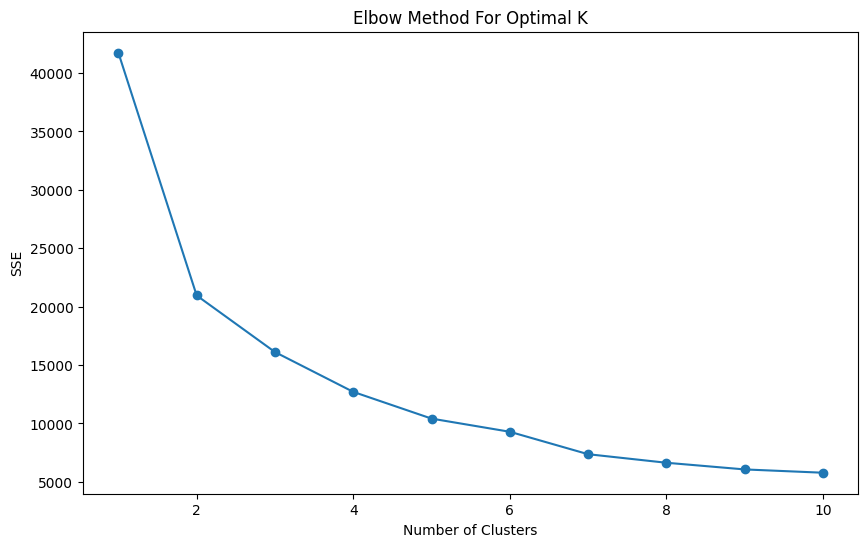

In [13]:
# Step 2: Choosing a Clustering Algorithm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow method to find optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    sse.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [22]:
# Step 3: Evaluate Clustering Results

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_clustering)
silhouette_avg = silhouette_score(X_clustering, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3424546365781531


In [26]:
# Cluster Profiling

# Exclude non-numeric columns for aggregation
numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns

# Perform cluster profiling by aggregating numeric features
cluster_summary = df_encoded[numeric_columns].groupby(df_encoded['cluster']).mean()

print("\n--- Cluster Profiling ---")
print(cluster_summary)


--- Cluster Profiling ---
           Campaign_ID  Conversion_Rate  Acquisition_Cost       ROI  \
cluster                                                               
0        550473.763009         0.081550          0.395600  3.319747   
1        551218.944007         0.079672          0.805960  3.179106   
2        548814.671114         0.077575          0.091514  2.887293   

               Clicks   Impressions  Engagement_Score       CPA  Total_Spend  \
cluster                                                                        
0        14628.625732  45367.443476          4.640690  0.046988     0.395600   
1        28749.295880  87929.265498          4.337342  0.049290     0.805960   
2         3779.218404  12876.851528          3.884447  0.058323     0.091514   

                 ROAS       CTR  Engagement_Rate       Week     Month    Year  \
cluster                                                                         
0        2.276131e-16  0.927295         0.030304  26.5

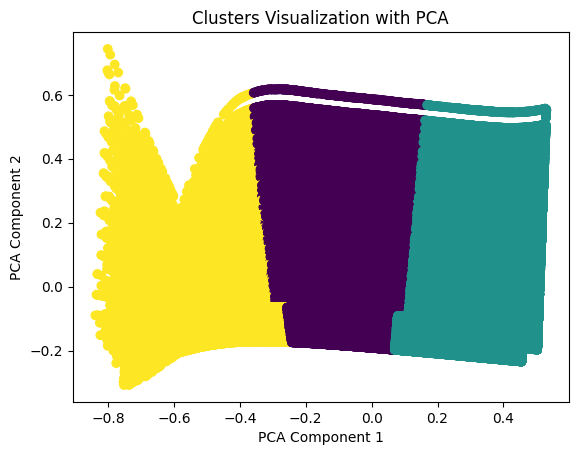

In [28]:
# Step 4: Visualize Clusters

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducing the dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Clusters Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
Concluding the Project

    Summarize your findings and explain the business insights derived from your analysis. For example:
        Which borrower segments are most at risk of default?
        What are the key factors contributing to default?
        How can these insights be applied to improve future lending decisions?